In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [49]:
#data = pd.read_excel("ames.xlsx")
path = '/content/drive/MyDrive/ames.xlsx'
data = pd.read_excel(path)

# **MODELLING AND REGRESSION**

In [15]:
train=data.drop(['Misc_Val','Mo_Sold','Yr_Sold','Bldg_Type','BsmtFin_SF_2','Low_Qual_Fin_SF','Bsmt_Half_Bath','Kitchen_AbvGr','_3Ssn_Porch','Overall_Cond','SalePrice','Order','PID','MS_SubClass','MS_Zoning','Street','Alley','Lot_Shape','Land_Contour','Utilities','Lot_Config','Land_Slope','Neigh_borhood','Condition_1','Condition_2','Roof_Style','Roof_Matl','Exterior_1st','Exterior_2nd','Mas_Vnr_Type','Exter_Qual','Exter_Cond','Foundation','Bsmt_Qual','Bsmt_Cond','Bsmt_Exposure','BsmtFin_Type_1','BsmtFin_Type_2','Heating','Heating_QC','Central_Air','Electrical','Kitchen_Qual','Functional','Fireplace_Qu','Garage_Type','Garage_Finish','Garage_Qual','Garage_Cond','Paved_Drive','Pool_QC','Fence','Misc_Feature','Sale_Type','Sale_Condition'], axis=1)
test=data['SalePrice']

In [16]:
train

,Lot_Frontage,Lot_Area,House_Style,Overall_Qual,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,Bsmt_Unf_SF,Total_Bsmt_SF,...,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Screen_Porch,Pool_Area
0,88,11394,1,9,2010,2010,350,1445,411,1856,...,8,1,2010,3,834,113,0,0,0,0
1,57,12853,1,8,2010,2010,0,1032,610,1642,...,6,1,2010,3,852,160,192,0,0,0
2,64,7360,1,7,2010,2010,80,24,1198,1222,...,6,0,2009,2,615,0,54,0,0,0
3,102,12858,2,9,2009,2010,162,0,1590,1590,...,10,1,2009,3,751,144,133,0,0,0
4,83,10159,1,9,2009,2010,450,1646,284,1930,...,8,1,2010,3,606,168,95,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,80,8000,1,5,1960,1960,0,1098,125,1377,...,6,2,1965,1,351,0,0,0,0,0
1347,80,8240,1,6,1960,1960,198,0,1179,1179,...,5,0,1960,2,622,0,0,0,0,0
1348,80,10800,1,5,1960,1960,88,632,616,1248,...,6,0,1960,1,286,0,0,0,0,0
1349,80,11600,1,6,1960,1960,175,565,818,1383,...,7,0,1960,1,292,0,45,0,0,0


In [194]:
train.describe(include='all')

,Lot_Frontage,Lot_Area,House_Style,Overall_Qual,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,Bsmt_Unf_SF,Total_Bsmt_SF,...,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Screen_Porch,Pool_Area
count,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,...,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000
mean,71.096225,10050.164323,1.400444,6.760178,1991.547742,1993.666173,147.974093,522.735011,639.202813,1207.598075,...,6.669134,0.656551,1992.264249,2.113990,562.615840,114.080681,58.861584,7.166543,15.712065,1.905255
std,26.112258,7733.063265,0.490170,1.336745,16.015193,15.208196,206.979376,521.932510,490.631174,461.685704,...,1.552323,0.602857,15.445739,0.589064,181.235982,124.434663,63.424117,36.777847,55.171564,30.977960
min,21.000000,1300.000000,1.000000,4.000000,1960.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,1960.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7800.000000,1.000000,6.000000,1976.000000,1979.500000,0.000000,0.000000,255.500000,870.000000,...,6.000000,0.000000,1977.000000,2.000000,449.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,9650.000000,1.000000,7.000000,1999.000000,2000.000000,51.000000,472.000000,491.000000,1151.000000,...,7.000000,1.000000,1999.000000,2.000000,527.000000,105.000000,44.000000,0.000000,0.000000,0.000000
75%,84.000000,11700.000000,2.000000,8.000000,2005.000000,2006.000000,237.500000,853.500000,933.500000,1494.000000,...,7.500000,1.000000,2005.000000,2.000000,660.000000,192.000000,84.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,2.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,...,15.000000,3.000000,2010.000000,4.000000,1418.000000,870.000000,484.000000,368.000000,440.000000,648.000000


In [195]:
train.isnull().sum()

Lot_Frontage      0
Lot_Area          0
House_Style       0
Overall_Qual      0
Year_Built        0
Year_Remod_Add    0
Mas_Vnr_Area      0
BsmtFin_SF_1      0
Bsmt_Unf_SF       0
Total_Bsmt_SF     0
_1st_Flr_SF       0
_2nd_Flr_SF       0
Gr_Liv_Area       0
Bsmt_Full_Bath    0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Yr_Blt     0
Garage_Cars       0
Garage_Area       0
Wood_Deck_SF      0
Open_Porch_SF     0
Enclosed_Porch    0
Screen_Porch      0
Pool_Area         0
dtype: int64

In [196]:
data.median()

<ipython-input-196-135339ac59ce>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Order                   1459.0
PID                532479050.0
MS_SubClass               60.0
Lot_Frontage              72.0
Lot_Area                9650.0
Neigh_borhood             14.0
Bldg_Type                  1.0
House_Style                1.0
Overall_Qual               7.0
Overall_Cond               5.0
Year_Built              1999.0
Year_Remod_Add          2000.0
Mas_Vnr_Area              51.0
BsmtFin_SF_1             472.0
BsmtFin_SF_2               0.0
Bsmt_Unf_SF              491.0
Total_Bsmt_SF           1151.0
_1st_Flr_SF             1211.0
_2nd_Flr_SF                0.0
Low_Qual_Fin_SF            0.0
Gr_Liv_Area             1552.0
Bsmt_Full_Bath             0.0
Bsmt_Half_Bath             0.0
Full_Bath                  2.0
Half_Bath                  0.0
Bedroom_AbvGr              3.0
Kitchen_AbvGr              1.0
TotRms_AbvGrd              7.0
Fireplaces                 1.0
Garage_Yr_Blt           1999.0
Garage_Cars                2.0
Garage_Area              527.0
Wood_Dec

In [197]:
train.skew()

Lot_Frontage       1.393751
Lot_Area          15.122125
House_Style        0.406812
Overall_Qual       0.112491
Year_Built        -0.651178
Year_Remod_Add    -0.876426
Mas_Vnr_Area       2.048278
BsmtFin_SF_1       1.486725
Bsmt_Unf_SF        0.821011
Total_Bsmt_SF      1.701112
_1st_Flr_SF        1.348249
_2nd_Flr_SF        0.809033
Gr_Liv_Area        1.581823
Bsmt_Full_Bath     0.268425
Full_Bath         -0.549608
Half_Bath          0.242011
Bedroom_AbvGr      0.096595
TotRms_AbvGrd      0.777996
Fireplaces         0.427502
Garage_Yr_Blt     -0.710974
Garage_Cars        0.057361
Garage_Area        0.866814
Wood_Deck_SF       1.386615
Open_Porch_SF      1.719593
Enclosed_Porch     5.419277
Screen_Porch       3.725424
Pool_Area         17.489860
dtype: float64

In [198]:
train.kurt()

Lot_Frontage       11.294228
Lot_Area          373.820234
House_Style        -1.837226
Overall_Qual       -0.527170
Year_Built         -1.155004
Year_Remod_Add     -0.729153
Mas_Vnr_Area        5.838837
BsmtFin_SF_1        7.620634
Bsmt_Unf_SF        -0.233036
Total_Bsmt_SF      13.200375
_1st_Flr_SF         7.306925
_2nd_Flr_SF        -0.699939
Gr_Liv_Area         6.765406
Bsmt_Full_Bath     -1.474748
Full_Bath           0.280091
Half_Bath          -1.549895
Bedroom_AbvGr       1.956661
TotRms_AbvGrd       1.161297
Fireplaces         -0.092098
Garage_Yr_Blt      -1.003776
Garage_Cars         0.021498
Garage_Area         1.058295
Wood_Deck_SF        3.517955
Open_Porch_SF       4.260090
Enclosed_Porch     29.927469
Screen_Porch       14.171590
Pool_Area         315.811758
dtype: float64

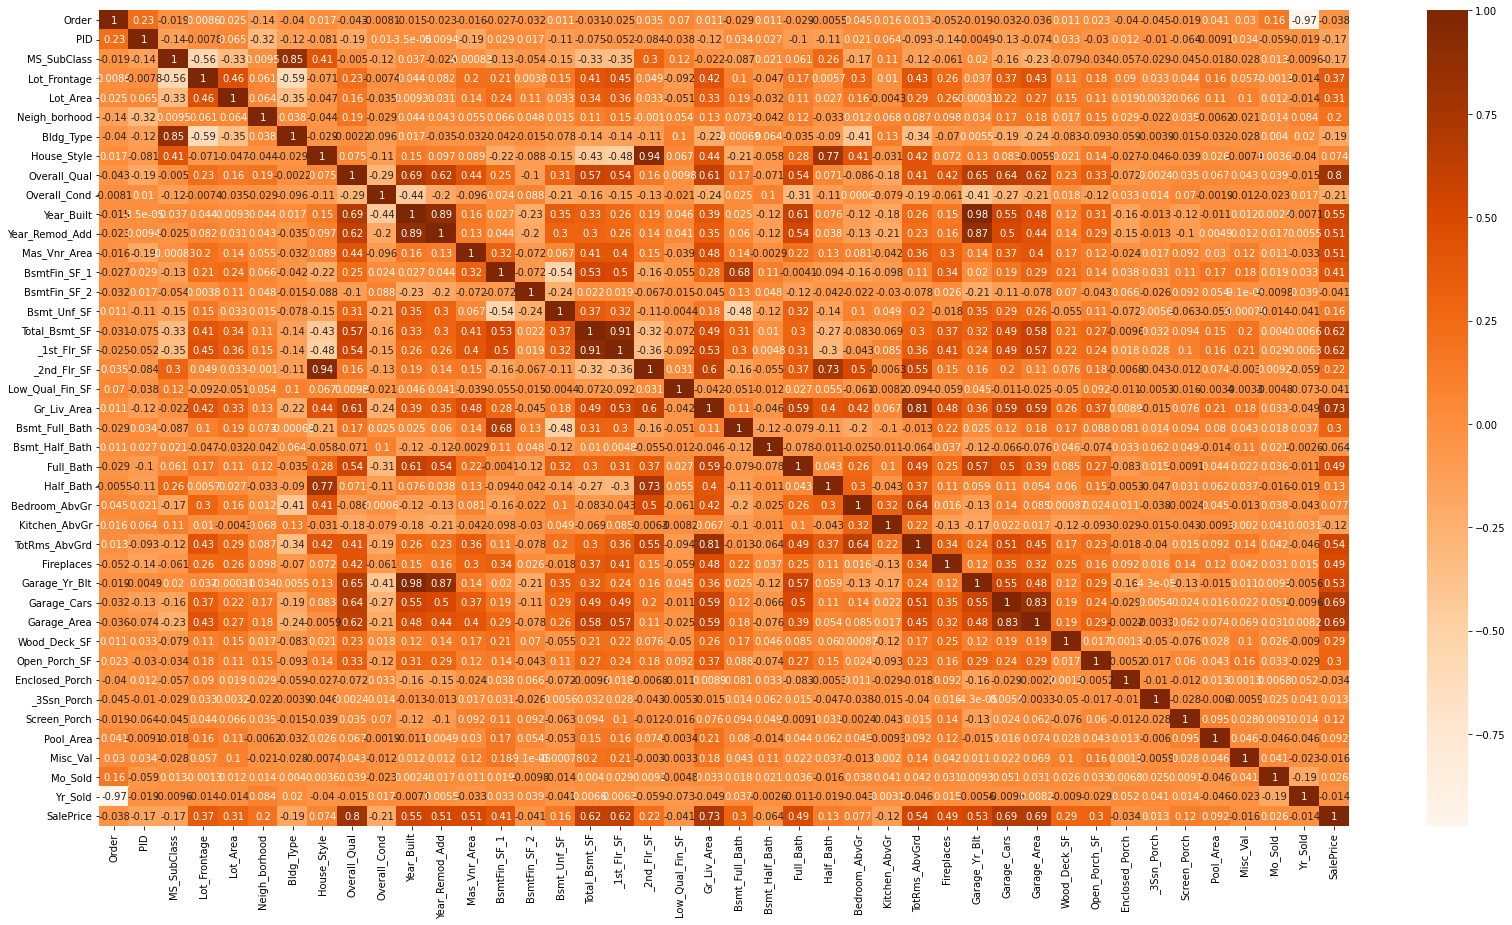

In [199]:
df=data.drop(['Order','PID','MS_SubClass','Street','Alley','Land_Contour','Utilities','Lot_Config','Land_Slope','Condition_1','Condition_2','Roof_Style','Roof_Matl','Exterior_1st','Exterior_2nd','Mas_Vnr_Type','Exter_Qual','Exter_Cond','Foundation','Bsmt_Qual','Bsmt_Cond','Bsmt_Exposure','BsmtFin_Type_1','BsmtFin_Type_2','Heating','Heating_QC','Central_Air','Electrical','Functional','Fireplace_Qu','Garage_Type','Garage_Finish','Garage_Qual','Garage_Cond','Paved_Drive','Pool_QC','Fence','Misc_Feature','Sale_Condition'], axis=1)
plt.figure(figsize=(28,15))
sns.heatmap(data.corr(),cmap='Oranges',annot=True)

In [200]:
train.isnull().sum()

Lot_Frontage      0
Lot_Area          0
House_Style       0
Overall_Qual      0
Year_Built        0
Year_Remod_Add    0
Mas_Vnr_Area      0
BsmtFin_SF_1      0
Bsmt_Unf_SF       0
Total_Bsmt_SF     0
_1st_Flr_SF       0
_2nd_Flr_SF       0
Gr_Liv_Area       0
Bsmt_Full_Bath    0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Yr_Blt     0
Garage_Cars       0
Garage_Area       0
Wood_Deck_SF      0
Open_Porch_SF     0
Enclosed_Porch    0
Screen_Porch      0
Pool_Area         0
dtype: int64

# **LINEAR REGRESSION**

In [201]:
X_train, X_test,y_train,y_test = train_test_split(train,test,test_size=0.3,random_state=2)

In [202]:
#TRAIN-TEST SPLIT (70/30)
X_train, X_test,y_train,y_test = train_test_split(train,test,test_size=0.3,random_state=2)

#MODELLING USING LINEAR REGRESSION AND TRAINING DATA
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [203]:
print('Linear Model Coeff (m)', regr.coef_)
print('Linear Model Coeff (b)', regr.intercept_)

Linear Model Coeff (m) [-9.74932296e+00  5.91250016e-01 -6.83765763e+04  2.64133416e+04
 -2.99306928e+02  3.66267589e+02  3.69131388e+01  4.42474432e+00
 -1.12960711e+01  9.37238317e+00  3.93403115e+01  9.73694716e+01
  1.64024811e+00  1.05397706e+04 -1.24899777e+03  9.21073274e+03
 -2.59848283e+02  1.00979651e+03  6.61311317e+03  5.92882294e+02
  1.77444136e+04  1.08750483e+01  1.29591470e+01 -6.19365884e+01
 -1.42731726e+01  9.78390821e+01 -1.13478159e+02]
Linear Model Coeff (b) -1346201.2866149065


In [204]:
#TRAINING DATA MULTIPLE TIMES TO OBTAIN BEST SCORE

for i in range(20):
  X_train, X_test,y_train,y_test = train_test_split(train,test,test_size=0.3,random_state=2)
  regr = LinearRegression()
  regr.fit(X_train, y_train)  
  acc = regr.score(X_test,y_test)
  print('ACCURACY OF TRIAL',i+1,':',acc)
print('----------------------------------')
print("COEFFICIENT:")
print('Linear Model Coeff (m)', regr.coef_)
print("INTERCEPT:")
print('Linear Model Coeff (b)', regr.intercept_)

ACCURACY OF TRIAL 1 : 0.8302359269818637
ACCURACY OF TRIAL 2 : 0.8302359269818637
ACCURACY OF TRIAL 3 : 0.8302359269818637
ACCURACY OF TRIAL 4 : 0.8302359269818637
ACCURACY OF TRIAL 5 : 0.8302359269818637
ACCURACY OF TRIAL 6 : 0.8302359269818637
ACCURACY OF TRIAL 7 : 0.8302359269818637
ACCURACY OF TRIAL 8 : 0.8302359269818637
ACCURACY OF TRIAL 9 : 0.8302359269818637
ACCURACY OF TRIAL 10 : 0.8302359269818637
ACCURACY OF TRIAL 11 : 0.8302359269818637
ACCURACY OF TRIAL 12 : 0.8302359269818637
ACCURACY OF TRIAL 13 : 0.8302359269818637
ACCURACY OF TRIAL 14 : 0.8302359269818637
ACCURACY OF TRIAL 15 : 0.8302359269818637
ACCURACY OF TRIAL 16 : 0.8302359269818637
ACCURACY OF TRIAL 17 : 0.8302359269818637
ACCURACY OF TRIAL 18 : 0.8302359269818637
ACCURACY OF TRIAL 19 : 0.8302359269818637
ACCURACY OF TRIAL 20 : 0.8302359269818637
----------------------------------
COEFFICIENT:
Linear Model Coeff (m) [-9.74932296e+00  5.91250016e-01 -6.83765763e+04  2.64133416e+04
 -2.99306928e+02  3.66267589e+02 

In [205]:
#USING LINEAR REGRESSION TO PREDICT TEST DATA
pred = regr.predict(X_test) 
pred

array([317636.85535476, 128660.31919802, 147137.02514352, 203310.79816864,
       152554.81322448, 285201.91041319, 210178.91657339,  89722.56329153,
       256261.55793498, 210528.25585309, 236762.60979628, 159271.65666759,
       166326.89960259, 466279.56421117, 220699.57292382, 273373.17235807,
       187293.78835043, 170424.48476201, 184997.89191969, 321793.23810739,
       170677.1691249 , 190649.71875767, 320129.43006081, 179355.3048741 ,
       120524.21779562, 325403.33790927, 152570.81868685, 282340.22919456,
       331780.70480541, 215819.59512109, 229532.04578616, 248135.20753496,
       388116.17925244, 104056.76353755, 285142.51003237, 280839.53945568,
       184696.51319785, 178273.36165571, 178443.26367672, 179652.38741942,
       215227.21842877, 320167.16577773, 195047.47584975, 190512.76617396,
       139502.56787668, 233398.64513522, 129460.84356142, 316882.07120508,
       205553.74753089, 186391.31436664, 345531.25306492, 152703.39077984,
       140717.83422521, 2

In [206]:
#MODEL SCORE
print("The model score is:")
regr.score(X_test, y_test)

The model score is:


0.8302359269818637

In [207]:
regr.score(X_train,y_train)

0.8030080988585545

Text(0.5, 1.0, 'Linear regression Predictions of Sale Price vs Actual Sale Price')

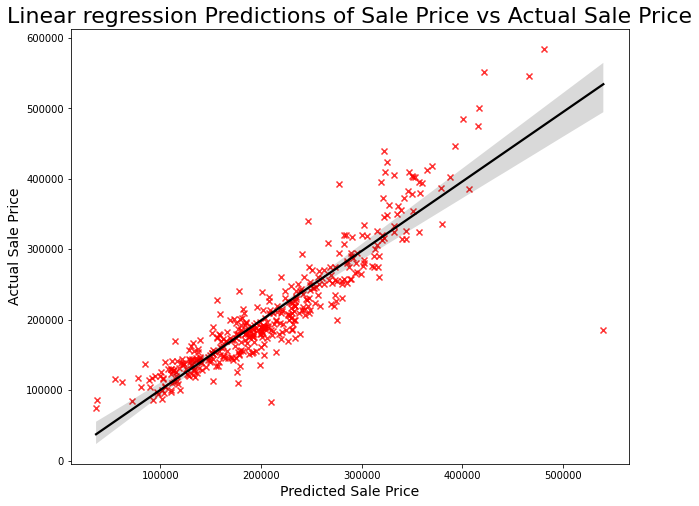

In [208]:
linear_preds = regr.predict(X_test)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train, x=linear_preds, y=y_test, marker='x', color='red', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Linear regression Predictions of Sale Price vs Actual Sale Price', fontsize=22)

In [209]:
intercept = regr.intercept_
intercept

-1346201.2866149065

In [210]:
coefficients = regr.coef_
coefficients

array([-9.74932296e+00,  5.91250016e-01, -6.83765763e+04,  2.64133416e+04,
       -2.99306928e+02,  3.66267589e+02,  3.69131388e+01,  4.42474432e+00,
       -1.12960711e+01,  9.37238317e+00,  3.93403115e+01,  9.73694716e+01,
        1.64024811e+00,  1.05397706e+04, -1.24899777e+03,  9.21073274e+03,
       -2.59848283e+02,  1.00979651e+03,  6.61311317e+03,  5.92882294e+02,
        1.77444136e+04,  1.08750483e+01,  1.29591470e+01, -6.19365884e+01,
       -1.42731726e+01,  9.78390821e+01, -1.13478159e+02])

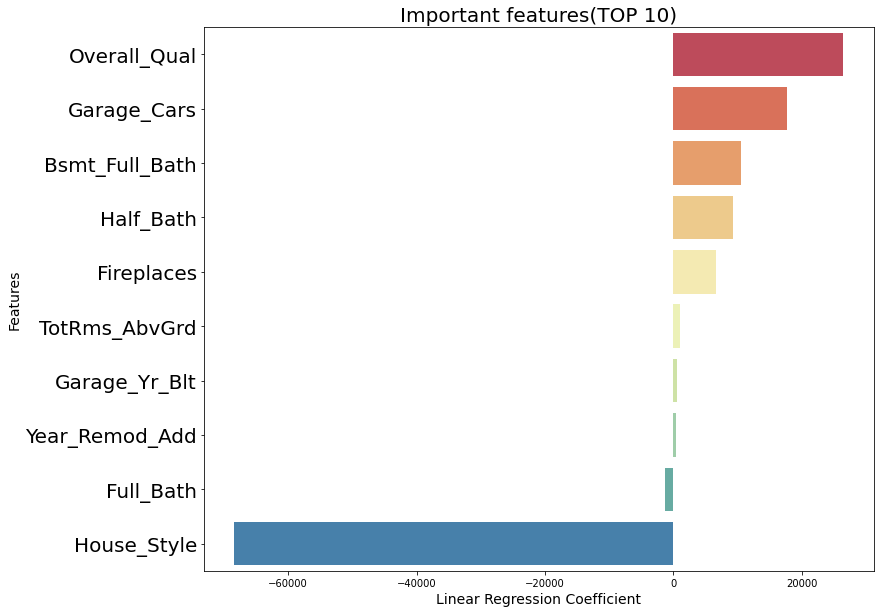

In [211]:
# Create dataframe of features, coefficients and absolute coefficients
LRdf = pd.DataFrame(columns=['Feature', 'Coef', 'Abs Coef'])
LRdf['Abs Coef'] = abs(regr.coef_)
LRdf['Coef'] = regr.coef_
LRdf['Feature'] = train.columns

# Plot top 30 features (sorted by absolute regression coefficient)
plt.figure(figsize=(12,10))
data = LRdf.sort_values(by='Abs Coef', ascending=False).head(10)[['Feature', 'Coef']] \
               .sort_values(by='Coef', ascending=False).reset_index(drop=True)
    
ax = sns.barplot(data=data, y='Feature', x='Coef', orient='h', palette='Spectral')
ax.set_ylabel('Features',size=14)
ax.set_yticklabels(data['Feature'], size=20)
ax.set_xlabel('Linear Regression Coefficient', fontsize=14)
plt.title('Important features(TOP 10)', fontsize=20);

In [6]:
mlr= smf.ols(formula="SalePrice ~ Lot_Frontage+Lot_Area+House_Style+Overall_Qual+Year_Built+Year_Remod_Add+Mas_Vnr_Area+BsmtFin_SF_1+Bsmt_Unf_SF+Total_Bsmt_SF+TotRms_AbvGrd+Fireplaces+Garage_Yr_Blt+Garage_Cars+Garage_Area+Wood_Deck_SF+Open_Porch_SF+Enclosed_Porch+Screen_Porch+Pool_Area", data=data).fit()

In [165]:
#residual standard error
print(np.sqrt(mlr.mse_resid))

40800.776074012894


In [166]:
#RESUDIAL STANDART ERROR resid sq divide by deg of reedom of resid
print(np.sqrt(sum(mlr.resid**2)/mlr.df_resid))

40800.77607401287


In [168]:
#residual standard error
print(np.sqrt(mlr.mse_resid))

const = sm.add_constant(X_train)
model =sm.OLS(y_train, const)
result = model.fit()
result

#Residual value = observed value - fitted value
print("THE RESIDUAL VALUES ARE:")
residulas = y_train -result.fittedvalues
print(residulas)

40800.776074012894
THE RESIDUAL VALUES ARE:
197    -24210.110939
905    -11228.838150
549     -9872.685418
128     -1950.807510
727     20687.597558
            ...     
466     19547.230653
299      3990.973343
493     -9086.846980
527    -31491.832847
1192    21381.862358
Length: 945, dtype: float64


In [169]:
residulas.describe()

count    9.450000e+02
mean    -6.287659e-10
std      4.015469e+04
min     -4.136602e+05
25%     -1.950707e+04
50%     -2.612973e+03
75%      1.726160e+04
max      2.727289e+05
dtype: float64

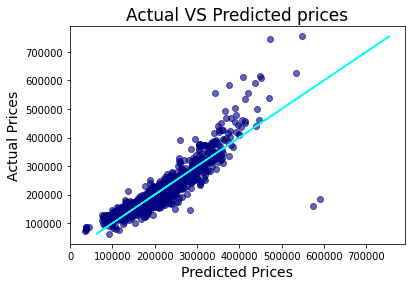

In [170]:
corr =round(y_train.corr(result.fittedvalues),4)
plt.scatter(y=y_train, x=result.fittedvalues,c='navy',alpha=0.6)
plt.plot(y_train,y_train,color='cyan')
plt.ylabel("Actual Prices",fontsize=14)
plt.xlabel("Predicted Prices", fontsize=14)
plt.title(f'Actual VS Predicted prices',fontsize=17)
plt.show()

# **REGRESSION TREES**

In [171]:
dec = DecisionTreeRegressor(random_state=2)

In [172]:
cross_val_score(dec, X_train, y_train, cv=10)

array([0.47275635, 0.84768728, 0.58347951, 0.64220886, 0.75086291,
       0.74553363, 0.34074448, 0.76379704, 0.87250163, 0.879729  ])

In [173]:
dec.fit(X_train, y_train, sample_weight=None, check_input=True)

DecisionTreeRegressor(random_state=2)

In [174]:
dec.tree_.max_depth

27

In [175]:
dec.score(X_test, y_test)

0.8075194431950872

In [176]:
pred = dec.predict(X_test) 
pred

array([262280., 148000., 120000., 192000., 140000., 259000., 215000.,
       105500., 254000., 202500., 253000., 130000., 175900., 625000.,
       162500., 262280., 169985., 129900., 155000., 370000., 145000.,
       162900., 285000., 133750., 151500., 370000., 175500., 290000.,
       535000., 224500., 233170., 266000., 419005.,  97000., 240000.,
       275500., 210400., 127000., 209000., 173000., 221370., 268500.,
       203160., 204000., 145000., 228500., 139000., 309000., 162900.,
       186500., 315000., 192000., 154000., 318000., 315750., 419005.,
       177594., 239900., 301500., 160000., 127500., 169000., 383970.,
       349265., 173000., 106000., 120000., 200500., 284000., 164990.,
       175000.,  89000., 187750., 159500., 210000.,  83000., 149900.,
       127500., 300000., 151500., 192000., 190000., 155000., 129500.,
       207000., 250000., 415000., 148000., 129900., 140000.,  87550.,
       190000., 156000., 355000., 120750., 110000., 281213., 125000.,
       315000., 3420

In [177]:
dec.score(X_test, y_test)

0.8075194431950872

Text(0.5, 1.0, 'Predictions of Sale Price vs Actual Sale Price')

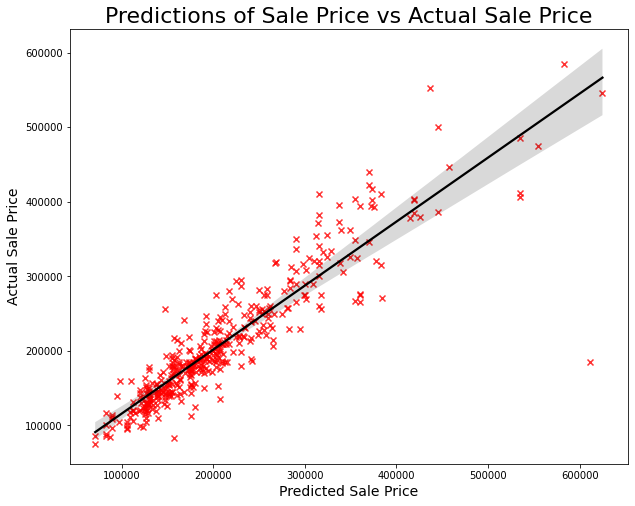

In [178]:
Dec_tressPred = dec.predict(X_test)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train, x=Dec_tressPred, y=y_test, marker='x', color='red', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22)

# **KNN**

In [179]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [180]:
pred = knn.predict(X_test) 
pred

array([290000, 159000, 115000, 124000,  94750, 169000, 162900, 146000,
       135000, 191000, 239900,  98600, 156932, 154204, 127500, 131000,
       191000, 127500, 110000, 207000, 156932, 127000, 320000, 130000,
       140000, 115000, 140000, 157000, 320000, 154000, 140500, 145000,
       184000,  94750, 239900, 250000, 181000, 155000, 118500, 136000,
       110000, 165000, 156932, 191000,  94750, 171000, 128500, 192500,
       154000, 152000, 220000, 200000, 159000, 145000, 131000, 220000,
       191000, 140500, 142600, 207500, 118000, 159000, 173000, 225000,
       207500, 118000, 124500, 171000, 145000, 214000, 155000, 105500,
       110000, 128000, 135000, 118000, 127000, 146000, 185000, 155000,
        94750, 173000, 157000, 127000, 158500, 180000, 207000, 159000,
       127000, 147000, 147000, 127500, 130000, 290000, 169000, 140000,
       180000, 151500, 250000, 175000, 215000,  98600, 181000, 120000,
       163990,  80000, 135000, 215000, 135000, 127000, 157000, 110000,
      

In [181]:
knn.score(X_test, y_test)

0.0049261083743842365

In [182]:
knn.score(X_train, y_train)

0.07513227513227513

Text(0.5, 1.0, 'Predictions of Sale Price vs Actual Sale Price')

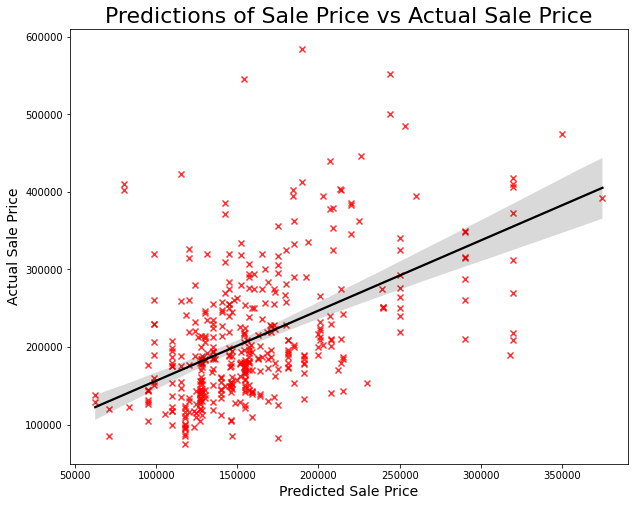

In [183]:
knn_pred = knn.predict(X_test) 

plt.figure(figsize=(10,8))
sns.regplot(data=X_train, x=knn_pred, y=y_test, marker='x', color='red', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22)

Text(0.5, 1.0, 'Predictions of Sale Price vs Actual Sale Price')

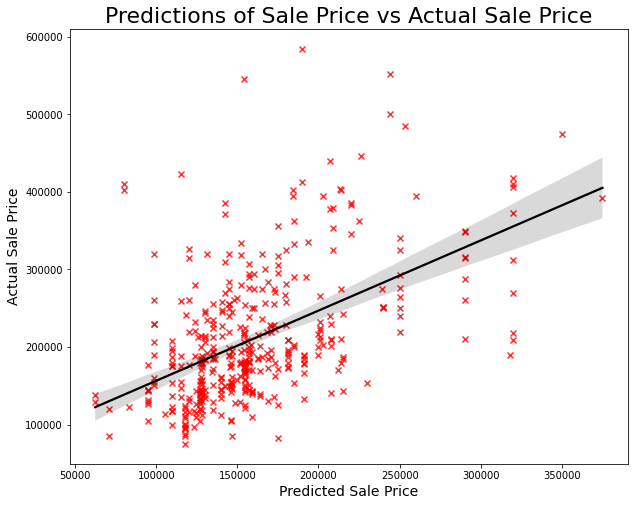

In [184]:
knn_pred = knn.predict(X_test) 

plt.figure(figsize=(10,8))
sns.regplot(data=X_train, x=knn_pred, y=y_test, marker='x', color='red', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22)

# **Factor Analysis**

In [18]:
fa = FactorAnalysis(n_components=15, random_state=2)
transformed=fa.fit_transform(train)

In [19]:
pd.DataFrame(transformed)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.177982,1.709374,-0.866693,0.101500,0.308692,-1.037571,-0.419955,-0.107317,0.224647,-1.480372,-0.357701,-0.331126,-0.329311,-0.172513,1.040144
1,0.364638,0.793267,-0.533928,0.802436,-1.120610,-1.793973,-0.089923,-1.148141,-1.073422,1.898399,-0.519323,-0.193925,0.056145,-1.057049,-0.461301
2,-0.348774,-1.001680,-0.634854,0.695572,0.215077,-0.781643,-0.668615,-0.135620,-0.106507,0.004944,-0.243355,-0.172146,0.228581,-0.568418,1.005746
3,0.363799,-1.259012,-1.510555,-0.897978,-0.897975,0.076196,0.086305,0.148753,0.225786,0.548507,-0.294171,-0.086591,-0.115798,0.609868,0.191788
4,0.018914,2.143867,-0.872367,0.110815,0.789485,0.803305,-0.001226,0.038616,0.448375,0.339447,-0.667944,-0.313796,-0.361957,-0.132259,1.330629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,-0.263810,1.233002,0.299124,1.144698,-0.496765,1.266686,-0.756296,0.844228,-0.127152,-1.085353,-0.431399,-0.257943,-0.347363,1.315188,-1.164654
1347,-0.235187,-1.050953,-0.539544,0.536364,0.975182,-0.894705,-0.642892,-0.183143,-0.141346,-0.840668,-0.076744,0.058127,0.440647,1.308094,-2.310555
1348,0.096768,0.101484,0.114288,1.135290,0.399624,1.633895,-0.746347,-0.027950,0.270873,-0.780098,-0.222875,-0.078532,-0.048180,1.305975,-1.189971
1349,0.200618,-0.077870,-0.289676,0.977139,0.710869,1.923905,-0.772664,0.123718,0.313900,-0.079582,-0.373536,-0.043913,-0.021151,1.242569,-1.483580


In [21]:
X_train, X_test,y_train,y_test = train_test_split(transformed,test,test_size=0.3,random_state=2)

In [22]:
regr_FA = LinearRegression()
regr_FA.fit(X_train, y_train)
pred = regr_FA.predict(X_test) 
pred

array([315017.62907272, 138315.04224951, 112835.14630275, 206580.24022678,
       102856.93931519, 262201.09448247, 204530.04206731, 115484.55249621,
       226354.10366743, 176160.9222172 , 253440.89676832, 182814.48286465,
       187655.79298673, 394890.82693593, 167714.5764272 , 280920.72989136,
       188286.91780757, 165801.6981309 , 212539.47589947, 340909.20305986,
       188872.96397451, 157316.74733827, 322954.13329659, 193088.9224686 ,
       112024.80699572, 346051.17945185, 142164.78885536, 282436.82033881,
       341910.68342017, 218378.84375626, 262334.854811  , 241831.15927341,
       346630.29343666, 142207.05150601, 267651.05134582, 282158.81526932,
       192127.2281856 , 151503.67414023, 210500.86249145, 187557.53650988,
       194545.42162083, 283799.97400236, 207019.7196021 , 191090.6895853 ,
       181337.27510077, 218805.99467627, 125415.25744312, 284238.1053619 ,
       186744.0758414 , 177004.55013388, 348920.42599459, 214074.35194968,
       152345.58123969, 2

In [23]:
regr_FA.score(X_train,y_train)

0.7312313743875155

In [24]:
regr_FA.score(X_test,y_test)

0.8004395497221262

Text(0.5, 1.0, 'Predictions of Sale Price vs Actual Sale Price')

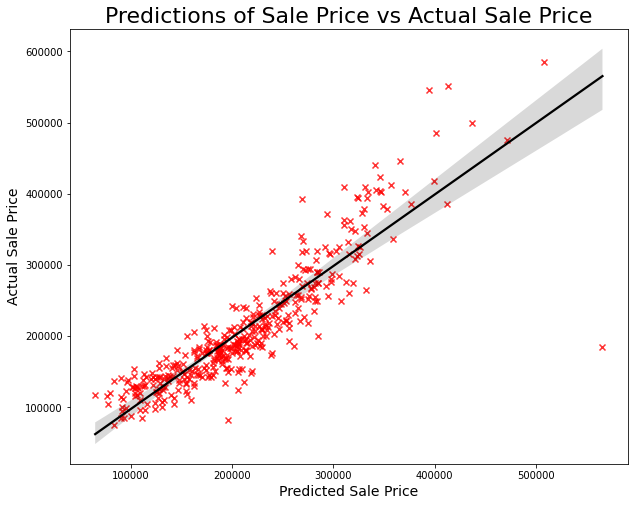

In [25]:
pred = regr_FA.predict(X_test) 

plt.figure(figsize=(10,8))
sns.regplot(data=X_train, x=pred, y=y_test, marker='x', color='red', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=22)

# **OUTLIER ANALYSIS**

40800.776074012894
40800.77607401287


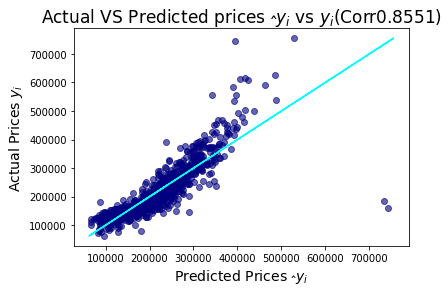

In [30]:
intercept = regr_FA.intercept_
intercept
coefficients = regr_FA.coef_
coefficients
mlr= smf.ols(formula="SalePrice ~ Lot_Frontage+Lot_Area+House_Style+Overall_Qual+Year_Built+Year_Remod_Add+Mas_Vnr_Area+BsmtFin_SF_1+Bsmt_Unf_SF+Total_Bsmt_SF+TotRms_AbvGrd+Fireplaces+Garage_Yr_Blt+Garage_Cars+Garage_Area+Wood_Deck_SF+Open_Porch_SF+Enclosed_Porch+Screen_Porch+Pool_Area", data=data).fit()
print(np.sqrt(mlr.mse_resid))
print(np.sqrt(sum(mlr.resid**2)/mlr.df_resid))
const = sm.add_constant(X_train) 
model =sm.OLS(y_train, const)
result = model.fit()
residulas = y_train -result.fittedvalues
corr =round(y_train.corr(result.fittedvalues),4) 
plt.scatter(y=y_train, x=result.fittedvalues,c='navy',alpha=0.6)
plt.plot(y_train,y_train,color='cyan')
plt.ylabel("Actual Prices $y _i$",fontsize=14)
plt.xlabel("Predicted Prices $\hat  y_i$", fontsize=14)
plt.title(f'Actual VS Predicted prices $\hat  y_i$ vs $y _i$(Corr{corr})',fontsize=17)
plt.show()

In [34]:
residulas

197    -21469.955777
905     16363.413045
549    -17861.198514
128    -13565.386092
727     -2538.045141
            ...     
466      1979.709537
299     -4887.978774
493     24922.427705
527    -31080.584895
1192    12742.820048
Length: 945, dtype: float64

In [33]:
residulas.describe()

count    9.450000e+02
mean    -2.058519e-10
std      4.690308e+04
min     -5.817718e+05
25%     -2.007251e+04
50%     -4.361900e+03
75%      1.784698e+04
max      3.495638e+05
dtype: float64

In [45]:
X=['Gr_Liv_Area']

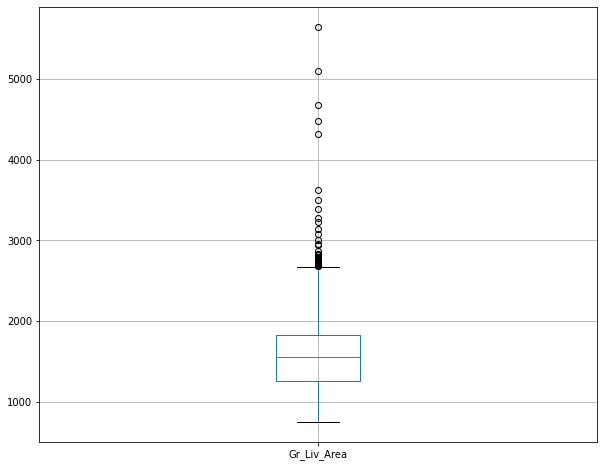

In [50]:
data.boxplot(X,figsize = (10,8))

In [51]:
for x in ['Gr_Liv_Area']: 
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan


In [52]:
#No.of outliers
data['Gr_Liv_Area'].isnull().sum()

39

In [53]:
data = data.dropna()

In [55]:
#Outliers have been removed
data['Gr_Liv_Area'].isnull().sum()

0